<a href="https://colab.research.google.com/github/Psubrat98/ML-Projects-With-Python/blob/main/Deep%20Learning/MY%20Project/Solar_PV_Module_Soil_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Solar PV Module Soil Detection System**

**Introduction**

Solar energy is radiant light and heat from the Sun that is harnessed using a range of ever-evolving technologies such as solar heating, photovoltaics, solar thermal energy. Solar power plant has become one of the major power production means throughout the world. India ranks at 6th position in solar power generation (20GW) as on date. The Government of India has set up a target of achieving100GW power production by 2022. Solar plants are preferred to other means of power production such as thermal, nuclear, geothermal, tidal, hydroelectric power plants because solar energy is easily available. As a result, the cost of power production becomes less. However, efficiency of solar power plants is affected by accumulation of snow, dirt, dust and other particles over the period of time that cover the surface of the PV module. This process is called Soiling effect. Due to this effect the efficiency and power generation capacity of the solar PV module decreases. This soiling effect cause an abnormal temperature distribution around the solar PV module which leads to failure of the modules. This results a huge loss in generation of energy production. Our proposed idea is to detect the soiling defect using FLIR camera installed on a Unmanned aerial vehicle. The FLIR camera will provide image processing data of the surface of solar PV module. Image processing is done by segmentation and linking algorithm using python. The segmentation principle which showed that the human vision performs groupings based on the similarity and continuity of the captured images. These groupings were the motivation of segmentation studies that extended the concept computationally. Search algorithms used to find edges, textures, patterns or differences which will ensure the level of soil deposition on the solar PV module. The image processing data is sent to the maintenance unit of the solar power plant.

**Data Collection**

Data has been collected from different public sources and arranged them propery for further process.

Importing required dependencies

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/ML Project/ML & DL MODELS/DL Models/Solar PV Model/New Set/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML Project/ML & DL MODELS/DL Models/Solar PV Model/New Set/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1452 images belonging to 7 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML Project/ML & DL MODELS/DL Models/Solar PV Model/New Set/Valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 308 images belonging to 7 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-17-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
46/46 [==============================] - 307s 6s/step - loss: 4.2855 - accuracy: 0.3085 - val_loss: 1.1770 - val_accuracy: 0.6071
Epoch 2/50
46/46 [==============================] - 22s 474ms/step - loss: 1.0023 - accuracy: 0.6674 - val_loss: 0.4961 - val_accuracy: 0.8052
Epoch 3/50
46/46 [==============================] - 21s 456ms/step - loss: 0.5876 - accuracy: 0.8189 - val_loss: 0.2758 - val_accuracy: 0.9545
Epoch 4/50
46/46 [==============================] - 22s 476ms/step - loss: 0.4658 - accuracy: 0.8712 - val_loss: 0.3064 - val_accuracy: 0.9545
Epoch 5/50
46/46 [==============================] - 21s 458ms/step - loss: 0.3914 - accuracy: 0.8967 - val_loss: 0.1709 - val_accuracy: 0.9610
Epoch 6/50
46/46 [==============================] - 22s 475ms/step - loss: 0.2706 - accuracy: 0.9415 - val_loss: 0.2778 - val_accuracy: 0.9383
Epoch 7/50
46/46 [==============================] - 22s 470ms/step - loss: 0.2634 - accuracy: 0.9353 - val_loss: 0.2283 - val_accuracy: 0.9610
E

In [18]:
import matplotlib.pyplot as plt

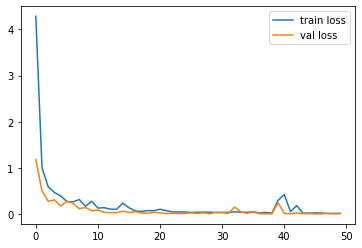

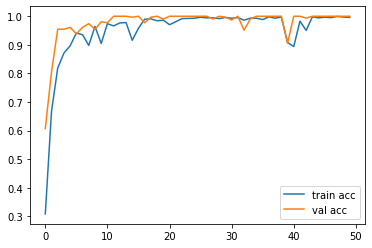

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_Solar_PV_resnet50.h5')

In [21]:
y_pred = model.predict(test_set)

10/10 [==============================] - 2s 116ms/step


In [22]:
y_pred

array([[1.0000000e+00, 7.2507254e-16, 6.0168742e-21, ..., 1.1312452e-20,
        7.7076393e-14, 2.4456203e-22],
       [2.2980252e-02, 3.3618588e-05, 7.3463138e-04, ..., 9.7623801e-01,
        2.3065836e-06, 3.3582783e-06],
       [4.7173994e-04, 7.8016421e-04, 9.9858737e-01, ..., 1.1015658e-04,
        1.2523250e-06, 4.8674956e-05],
       ...,
       [3.7781496e-02, 6.2063184e-05, 3.4985816e-04, ..., 9.6175689e-01,
        5.0488125e-06, 4.4782887e-06],
       [1.2630306e-03, 3.4629349e-10, 1.9075172e-11, ..., 1.5778998e-09,
        4.9505977e-09, 4.1238717e-08],
       [1.0000000e+00, 1.0393245e-14, 5.3535455e-19, ..., 1.9450310e-18,
        9.2847835e-14, 1.2507406e-15]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([0, 4, 2, 1, 5, 0, 3, 6, 4, 2, 0, 3, 6, 3, 5, 3, 5, 3, 3, 0, 4, 5,
       2, 4, 3, 0, 6, 0, 4, 2, 6, 4, 1, 6, 3, 3, 2, 2, 4, 5, 5, 6, 6, 6,
       4, 0, 2, 3, 0, 0, 4, 3, 2, 3, 4, 4, 6, 3, 6, 1, 6, 3, 0, 5, 3, 6,
       6, 0, 1, 3, 6, 1, 5, 6, 5, 0, 6, 6, 3, 1, 4, 4, 4, 6, 1, 4, 3, 6,
       4, 4, 2, 5, 2, 5, 3, 1, 1, 0, 4, 1, 2, 6, 2, 4, 4, 3, 3, 5, 1, 4,
       6, 2, 6, 3, 5, 3, 1, 0, 6, 0, 5, 0, 4, 2, 3, 4, 3, 4, 6, 0, 6, 1,
       0, 6, 6, 3, 2, 1, 3, 2, 2, 0, 5, 0, 5, 5, 3, 3, 5, 5, 3, 2, 5, 2,
       0, 0, 0, 2, 5, 3, 1, 0, 2, 1, 6, 2, 1, 4, 3, 6, 2, 0, 1, 5, 5, 2,
       4, 6, 0, 2, 2, 0, 2, 0, 4, 2, 1, 3, 3, 6, 1, 6, 0, 1, 5, 6, 2, 3,
       3, 5, 5, 0, 4, 6, 5, 3, 2, 2, 5, 1, 5, 6, 3, 6, 6, 4, 4, 3, 3, 5,
       3, 4, 2, 5, 2, 4, 2, 6, 5, 5, 6, 4, 3, 2, 3, 5, 2, 6, 2, 1, 6, 0,
       2, 6, 5, 4, 0, 0, 0, 5, 3, 4, 4, 6, 6, 2, 6, 0, 3, 1, 5, 5, 2, 0,
       3, 6, 1, 5, 4, 0, 6, 1, 5, 2, 0, 1, 0, 4, 0, 2, 2, 0, 3, 4, 4, 6,
       1, 5, 3, 4, 2, 3, 5, 3, 4, 6, 6, 0, 6, 0, 3,

label 0 : PV module with drop dust paticles
label 1 : PV module with less dust paticles
label 2 : PV module with more dust paticles

Testing images

In [42]:
#Creating a function for prediction
def predict(path):
  image = load_img(path, target_size=(224,224))
  img = np.array(image)
  img = img / 255
  img = img.reshape(1, 224, 224, 3)
  prediction = model.predict(img)
  print(f'Prediction value...\n{prediction}')
  label = np.argmax(prediction, axis=1)
  print('\n')
  print(f'Prediction Label:\n{label}')

In [43]:
predict('/content/drive/MyDrive/ML Project/ML & DL MODELS/DL Models/Solar PV Model/New Set/test/Some dust particles/solar_Fri_Jun_16_10__12__9_2017_L_0.899858300492_I_0.354243137255.jpg')

1/1 [==============================] - 0s 29ms/step
Prediction value...
[[2.4015289e-05 4.9645845e-05 1.0785455e-05 2.2762222e-04 7.7665745e-06
  5.5749734e-07 9.9967957e-01]]


Prediction Label:
[6]


**Concluson**

The out come of overall model training has an accuracy of 99% resulting a loss of 01%.